### Урок 1. Домашняя работа

Есть два набора точек - *x_hw* и *y_hw*. В рамках домашней работы нужно
* визуализировать набор точек
* найти коэффициенты регрессии $w_0, w_1$ по шагам, как в уроке
* посчитать предсказание в виде $\hat{y} = w_0 + w_1x$ и визуализировать его вместе с точками *x_hw* и *y_hw*

In [16]:
x_hw = [50, 60, 70, 100]
y_hw = [10, 15, 40, 45]

In [53]:
import numpy as np
from numpy.linalg import inv
from matplotlib import pyplot as plt
%matplotlib inline


In [50]:
# Расчет регрессии, оформляю для удобства в виде функции
def w_analytic(features, y):
# вычисляем к-ты линейной регрессии
    w = inv(
        features.T.dot(features)
    ).dot(
        features.T
    ).dot(
        y
    )
    return w
# print("Аналитически определённые коэффициенты \n%s" % ndprint(w_analytic))

In [52]:
X = np.array(x_hw)
Y = np.array(y_hw)

# Делаем массив из едениц
X1 = np.ones(X.shape, dtype=int)
# Меняем формы массивов на вертикальные
X = X.reshape(1,X.shape[0])
X1 = X1.reshape(1, X.shape[1])
# Склеиваем
X = np.concatenate((X1, X), axis = 0)
# Переворачиваем
X = X.T
X

array([[  1,  50],
       [  1,  60],
       [  1,  70],
       [  1, 100]])

In [55]:
w = w_analytic(X, Y)
w

array([-22.5       ,   0.71428571])

In [56]:
print(f'Получены коэффициенты регрессии: w0 = {round(w[0], 2)}, w1 = {round(w[1], 2)}')

Получены коэффициенты регрессии: w0 = -22.5, w1 = 0.71


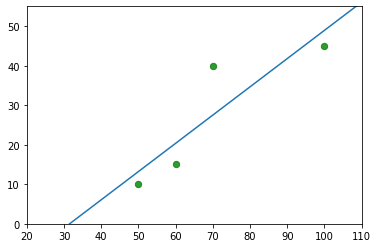

In [64]:
# вспомогательные вел
margin = 10
X_min = 20
X_max = X[:,1].max()+margin

# набор точек, чтобы нарисовать прямую
X_support = np.linspace(X_min, X_max, num=100)
# предсказания нашей модели
Y_model = w[0] + w[1]*X_support

# настройка графика 
plt.xlim(X_min, X_max)
plt.ylim(0, Y.max() + margin)
# рисуем исходные точки
plt.scatter(X[:,1], Y, 40, 'g', 'o', alpha=0.8)
# предсказания модели
plt.plot(X_support, Y_model)

plt.show()